# Проект: запросы SQL к БД

## Введение  

Компания-стартап купила крупный сервис для чтения книг по подписке. В базе данных сервиса — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

**Цель:** проанализировать базу данных:  

- Посчитать, сколько книг вышло после 1 января 2000 года;  
- Для каждой книги посчитать количество обзоров и среднюю оценку;  
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;  
- Определить автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;  
- Посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок.  
    
Исследование проводится в 3 этапа:

1. Обзор данных  
2. Исследовательский анализ данных   
3. Итоги исследования 

## Обзор данных  

Подключимся к базе.

In [1]:
# импортируем библиотеки

import pandas as pd
from sqlalchemy import create_engine

# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [2]:
# игнорируем предупреждения

import warnings
warnings.filterwarnings('ignore') 

# снимем ограничения на вывод строк и столбцов

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Ознакомимся с входными данными.  

- **Таблица books**

In [3]:
# выполним SQL запрос

query = ''' SELECT *
            FROM books
        '''

data_books = pd.io.sql.read_sql(query, con = engine)

# выведем информацию по таблице

display(data_books.head(5))
display(data_books.info())

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


None

- **Таблица authors**

In [4]:
# выполним SQL запрос

query = ''' SELECT *
            FROM authors
        '''

data_authors = pd.io.sql.read_sql(query, con = engine)

# выведем информацию по таблице

display(data_authors.head(5))
display(data_authors.info())

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


None

- **Таблица publishers**

In [5]:
# выполним SQL запрос

query = ''' SELECT *
            FROM publishers
        '''

data_publishers = pd.io.sql.read_sql(query, con = engine)

# выведем информацию по таблице

display(data_publishers.head(5))
display(data_publishers.info())

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


None

- **Таблица ratings**

In [6]:
# выполним SQL запрос

query = ''' SELECT *
            FROM ratings
        '''

data_ratings = pd.io.sql.read_sql(query, con = engine)

# выведем информацию по таблице

display(data_ratings.head(5))
display(data_ratings.info())

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


None

- **Таблица reviews**

In [7]:
# выполним SQL запрос

query = ''' SELECT *
            FROM reviews
        '''

data_reviews = pd.io.sql.read_sql(query, con = engine)

# выведем информацию по таблице

display(data_reviews.head(5))
display(data_reviews.info())

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


None

**В наличии следующие данные:**  

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.  

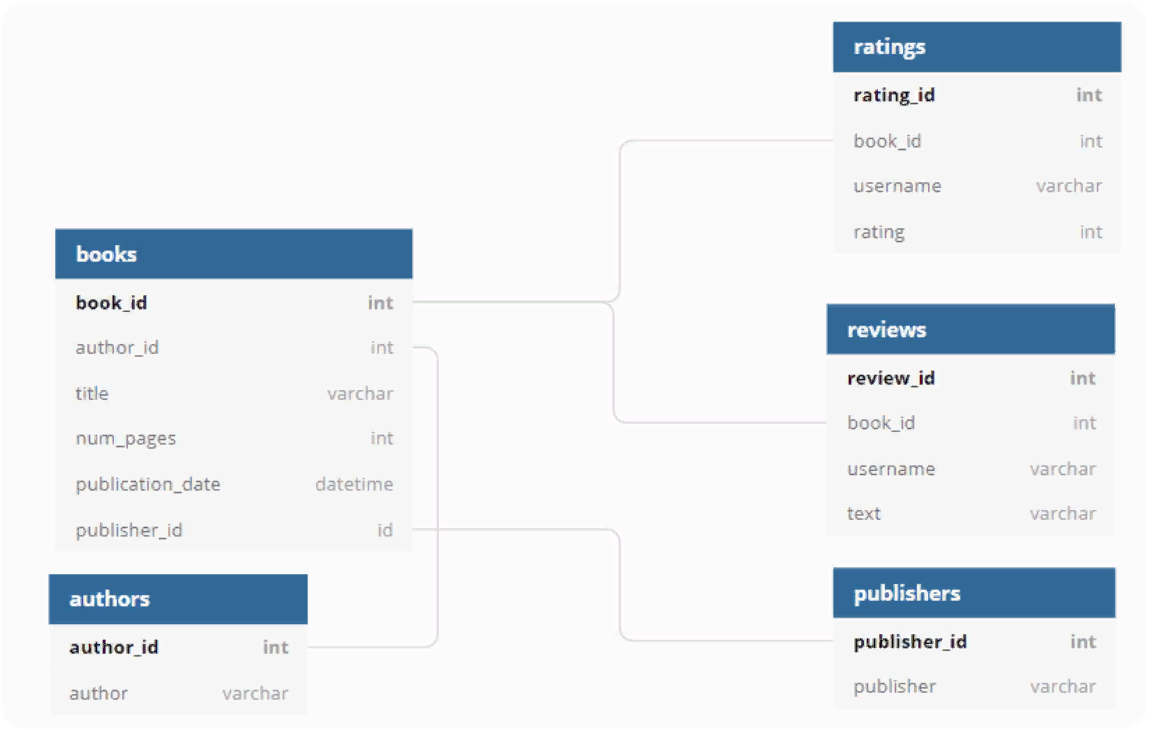

## Исследовательский анализ данных

### Посчитаем, сколько книг вышло после 1 января 2000 года

In [8]:
# выполняем запрос и сохраняем результат

query = ''' SELECT COUNT (book_id) AS count_book
            FROM books
            WHERE CAST (publication_date AS date) > '2000-01-01'
        '''

pd.io.sql.read_sql(query, con = engine)

,count_book
0,819


Посмотрим сколько всего книг вышло за весь период и найдем начальную и конечную даты этого периода.

In [9]:
# выполняем запрос и сохраняем результат

query = ''' SELECT 
            COUNT(book_id) AS count_book,
            MAX(CAST (publication_date AS date)) AS max_date,
            MIN(CAST (publication_date AS date)) AS min_date
            FROM books
        '''

pd.io.sql.read_sql(query, con = engine)

,count_book,max_date,min_date
0,1000,2020-03-31,1952-12-01


Книги выходили с 1 декабря 1952 года. После 1 января 2000 года вышло 819 книг, что составляет 82% от всех вышедших книг.

### Для каждой книги посчитаем количество обзоров и среднюю оценку  

- отсортируем по средней оценке

In [10]:
# выполняем запрос и сохраняем результат

query = ''' SELECT a.author, b.title, COUNT(DISTINCT rv.review_id) AS count_review, AVG (r.rating) AS avg_rating
            FROM books AS b 
                LEFT JOIN authors AS a ON b.author_id = a.author_id
                LEFT JOIN ratings AS r ON b.book_id = r.book_id
                LEFT JOIN reviews AS rv ON b.book_id = rv.book_id
            GROUP BY b.book_id, a.author
            ORDER BY avg_rating DESC
        '''

pd.io.sql.read_sql(query, con = engine)

,author,title,count_review,avg_rating
0,Mercedes Lackey,Arrows of the Queen (Heralds of Valdemar #1),2,5.000000
1,Robert Kirkman/Tony Moore/Charlie Adlard/Cliff...,The Walking Dead Book One (The Walking Dead #...,2,5.000000
2,William Faulkner,Light in August,2,5.000000
3,Jon Kabat-Zinn,Wherever You Go There You Are: Mindfulness Me...,2,5.000000
4,John Eldredge/Stasi Eldredge,Captivating: Unveiling the Mystery of a Woman'...,2,5.000000
5,James Clavell,Tai-Pan (Asian Saga #2),2,5.000000
6,Mark Twain/Shelly Fisher Fishkin,The Adventures of Tom Sawyer and Adventures of...,1,5.000000
7,Charles Dickens,Hard Times,2,5.000000
8,Kim Harrison,A Fistful of Charms (The Hollows #4),2,5.000000
9,Tamora Pierce,In the Hand of the Goddess (Song of the Liones...,2,5.000000


- отсортируем по кол-ву обзоров

In [11]:
# выполняем запрос и сохраняем результат

query = ''' SELECT a.author, b.title, COUNT(DISTINCT rv.review_id) AS count_review, AVG (r.rating) AS avg_rating
            FROM books AS b LEFT JOIN reviews AS rv ON b.book_id = rv.book_id
            LEFT JOIN ratings AS r ON b.book_id = r.book_id
            LEFT JOIN authors AS a ON b.author_id = a.author_id
            GROUP BY b.book_id, a.author
            ORDER BY count_review DESC
        '''

pd.io.sql.read_sql(query, con = engine)

,author,title,count_review,avg_rating
0,Stephenie Meyer,Twilight (Twilight #1),7,3.662500
1,Sara Gruen,Water for Elephants,6,3.977273
2,Jeannette Walls,The Glass Castle,6,4.206897
3,J.K. Rowling/Mary GrandPré,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.414634
4,Mark Haddon,The Curious Incident of the Dog in the Night-Time,6,4.081081
5,Dan Brown,The Da Vinci Code (Robert Langdon #2),6,3.830508
6,Paulo Coelho/Alan R. Clarke/Özdemir İnce,The Alchemist,6,3.789474
7,J.R.R. Tolkien,The Hobbit or There and Back Again,6,4.125000
8,Markus Zusak/Cao Xuân Việt Khương,The Book Thief,6,4.264151
9,Rick Riordan,The Lightning Thief (Percy Jackson and the Oly...,6,4.080645


Самое большое кол-во отзывов у книги Stephenie Meye "Twilight (Twilight #1)" - 7. 
Среди самой высокой средней оценки в 5 баллов, самое большое кол-во из 4 отзывов у книги Christopher Moore "A Dirty Job (Grim Reaper #1)".

### Определим издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [12]:
# выполняем запрос и сохраняем результат

query = ''' SELECT p.publisher, COUNT(b.book_id) AS count_book
            FROM books AS b 
            LEFT JOIN publishers AS p ON b.publisher_id = p.publisher_id
            WHERE b.num_pages > 50
            GROUP BY p.publisher
            ORDER BY count_book DESC
            LIMIT 1
        '''

pd.io.sql.read_sql(query, con = engine)

,publisher,count_book
0,Penguin Books,42


Издательство Penguin Books выпустило наибольшее число книг толще 50 страниц.

### Определим автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [29]:
# выполняем запрос и сохраняем результат

query = '''WITH data_1 AS
                (SELECT book_id, AVG(rating)
                FROM ratings
                GROUP BY book_id
                HAVING COUNT(rating_id) >= 50)
            SELECT a.author, AVG(avg)
            FROM data_1 AS d1
                LEFT JOIN books AS b ON d1.book_id = b.book_id
                LEFT JOIN authors AS a ON b.author_id = a.author_id
            GROUP BY a.author
            ORDER BY AVG(avg) DESC
            LIMIT 1
        '''
pd.io.sql.read_sql(query, con = engine)

,author,avg
0,J.K. Rowling/Mary GrandPré,4.283844


Автор с самой высокой средней оценкой книг - J.K. Rowling/Mary GrandPré.

### Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [14]:
# выполняем запрос и сохраняем результат
query = ''' WITH data_1 AS
                (SELECT username
                FROM ratings
                GROUP BY username
                HAVING COUNT(rating_id) > 50),
            data_2 AS
                (SELECT d.username, COUNT(DISTINCT review_id)
                FROM data_1 AS d
                    LEFT JOIN reviews AS r ON d.username = r.username
                GROUP BY d.username)
            SELECT AVG(count)
            FROM data_2
        '''
pd.io.sql.read_sql(query, con = engine)

,avg
0,24.333333


Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок равно 164.

## Итоги исследования:  

Прежде, чем исследовать данные, мы ознакомились с ними и описали.

Исследуя данные, определили что:  
- книги выходили с 1 декабря 1952 года. После 1 января 2000 года вышло 819 книг, что составляет 82% от всех вышедших книг;  
- самое большое кол-во отзывов у книги Stephenie Meye "Twilight (Twilight #1)" - 7. Среди самой высокой средней оценки в 5 баллов, самое большое кол-во из 4 отзывов у книги Christopher Moore "A Dirty Job (Grim Reaper #1)";  
- издательство Penguin Books выпустило наибольшее число книг толще 50 страниц;  
- автор с самой высокой средней оценкой книг - J.K. Rowling/Mary GrandPré;
- среднее количество обзоров от пользователей, которые поставили больше 50 оценок равно 24.